# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Challenge 1

#### The data we will use in this challenge is:

In [6]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

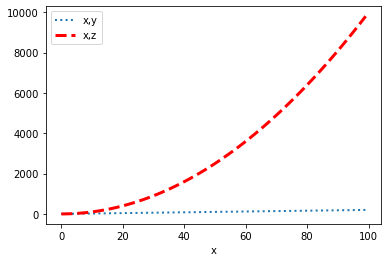

In [19]:
# Method 1
fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 2, linestyle=':')
ax.plot(x, z, color='red', linewidth = 3, linestyle = '--')
plt.legend(['x,y', 'x,z'])
plt.xlabel('x')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

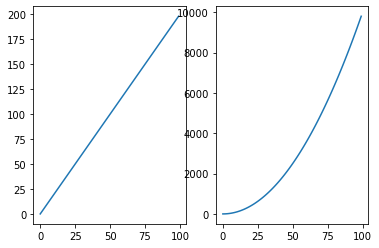

In [43]:
# Method 2
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(x, y)
ax[1].plot(x, z)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

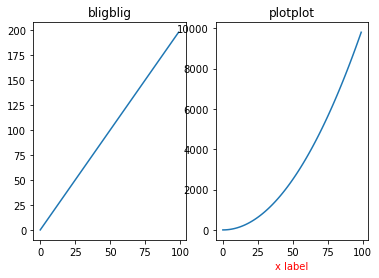

In [78]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, y, label='xy')
ax2.plot(x, z, label='xz')
plt.xlabel('x label', color='red')

ax1.set_title('bligblig')
ax2.set_title('plotplot')
ax1.set_label('x label')
ax2.set_label('x label')

plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [67]:
import math

Text(0.5, 1.0, 'log')

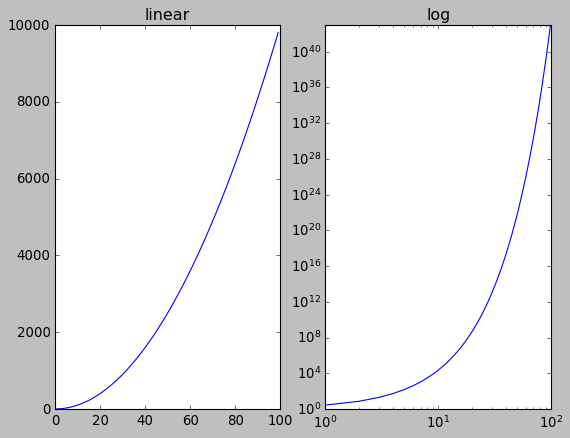

In [236]:
# your code here
y = x**2
z = math.e**x

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, y, label='xy')
ax1.set_xscale('linear')
ax2.plot(x, z, label='xz')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax1.set_title('linear')
ax2.set_title('log')

#### As a bonus challenge, try to add a legend to the plot.

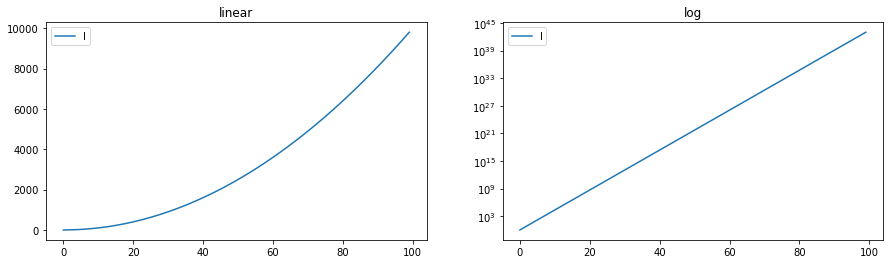

In [102]:
# your code here
y = x**2
z = math.e**x

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1.plot(x, y)
ax1.set_xscale('linear')
ax2.plot(x, z)
ax2.set_yscale('log')
ax1.set_title('linear')
ax2.set_title('log')

ax1.legend('linear')
ax2.legend('log')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. 
* db: `fitbit`
* table: `fitbit2`

In [105]:
# your code here
fitbit = pd.read_csv('/Users/lzapa/DataBootCampIronH/Labs/Week 4/5. Matplotlib-Seaborn/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

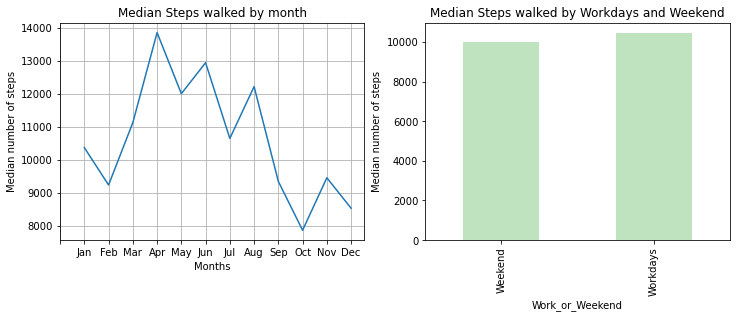

In [185]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
avg_steps = fitbit.groupby(by='Months_encoded')['Steps'].agg('median')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
plt.sca(axes[0])
avg_steps.plot(kind = 'line')
plt.grid()
plt.ylabel('Median number of steps')
plt.xlabel('Months')
plt.title('Median Steps walked by month')
plt.xticks(list(range(13)),['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.sca(axes[1])
avg_steps_workweekend = fitbit.groupby(by='Work_or_Weekend')['Steps'].agg('median').sort_values()
avg_steps_workweekend.plot(kind = 'bar',alpha = 0.5, colormap = 'Accent')
plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(list(range(2)), ['Weekend', 'Workdays'])

plt.savefig('steps_work_weekend.png', bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [176]:
fitbit.head(1)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.4,92.086331,0.0,0.0,May,5


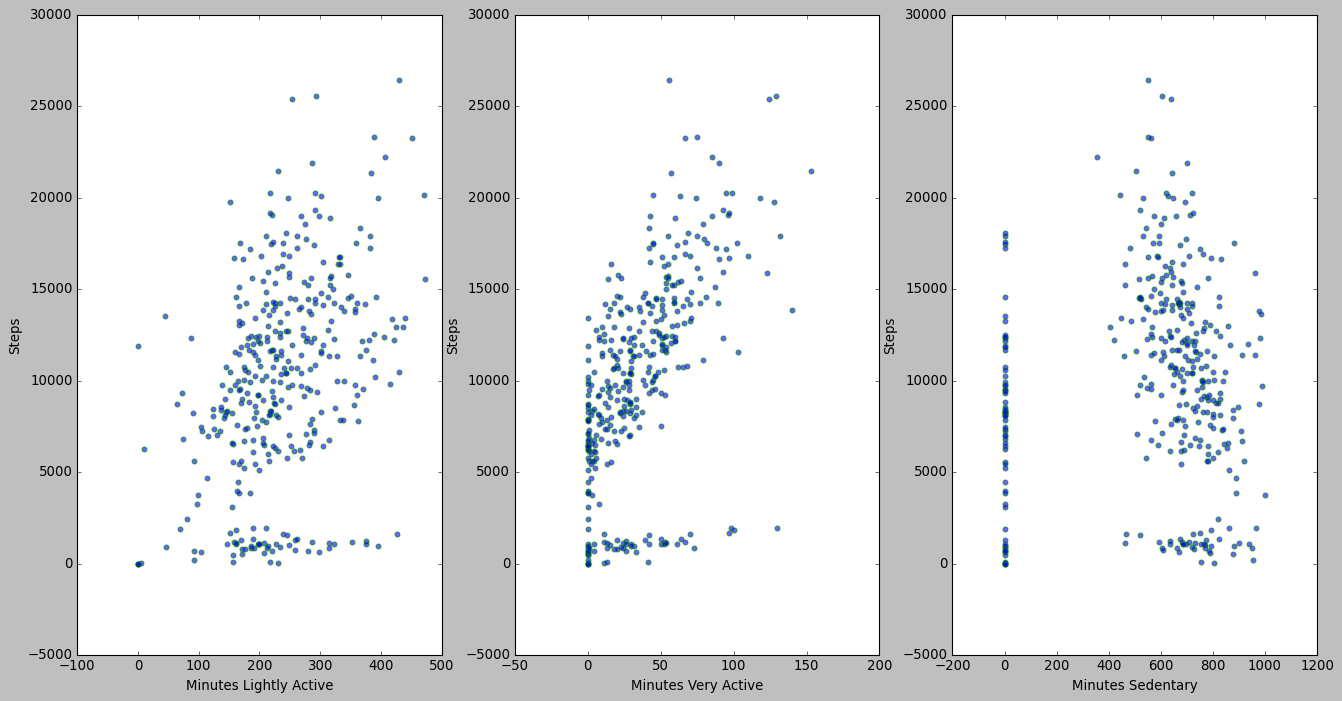

In [231]:
# your code here

cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary', 'Steps']
df=fitbit[cols]
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))

for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i], df['Steps'], alpha = 0.6, edgecolors='green')
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('Steps')
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. 
* db: `titanic`
* table: `titanic`

In [5]:
# your code here
titanic = pd.read_csv('/Users/lzapa/DataBootCampIronH/Labs/Week 4/5. Matplotlib-Seaborn/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [8]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [9]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [10]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=['int64', 'float64'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [18]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 4)

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

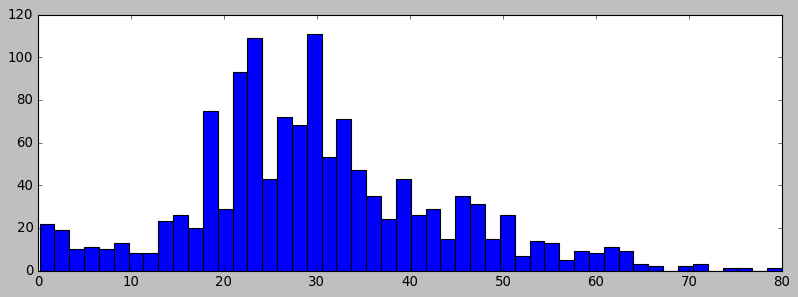

In [19]:
# your code here

plt.hist(titanic['Age'], bins = 50)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

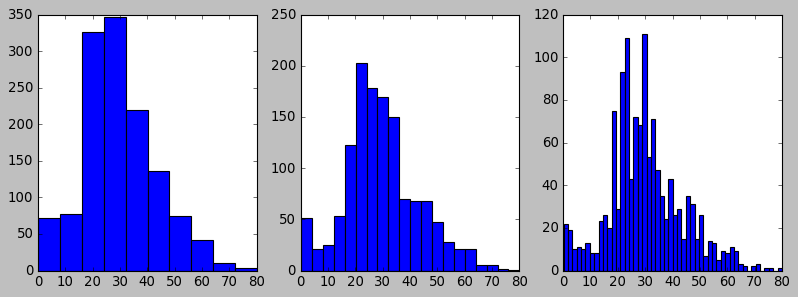

In [20]:
# your code here
plt.subplot(1, 3, 1)
plt.hist(titanic['Age'], bins=10)
plt.subplot(1, 3, 2)
plt.hist(titanic['Age'], bins=20)
plt.subplot(1, 3, 3)
plt.hist(titanic['Age'], bins=50)

#### How does the bin size affect your plot?

In [21]:
"""
The bin width (and thus number of categories or ranges) affects the ability of a histogram to identify local regions of
higher incidence. Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped.
"""

'\nThe bin width (and thus number of categories or ranges) affects the ability of a histogram to identify local regions of\nhigher incidence. Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped.\n'

#### Use seaborn to show the distribution of column `Age`.

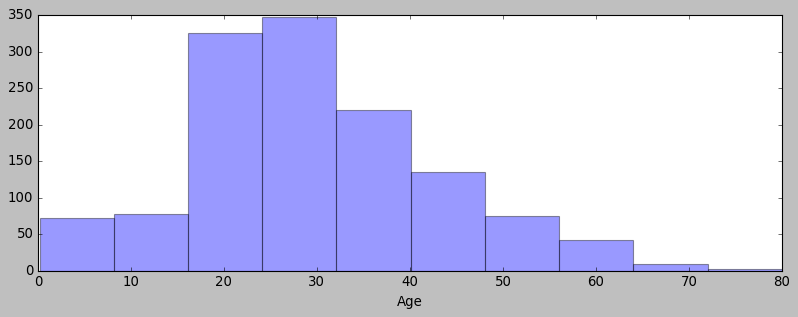

In [22]:
# your code here
sns.distplot(titanic["Age"], bins=10, kde = False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0.5, 1.0, 'Gender Counts')

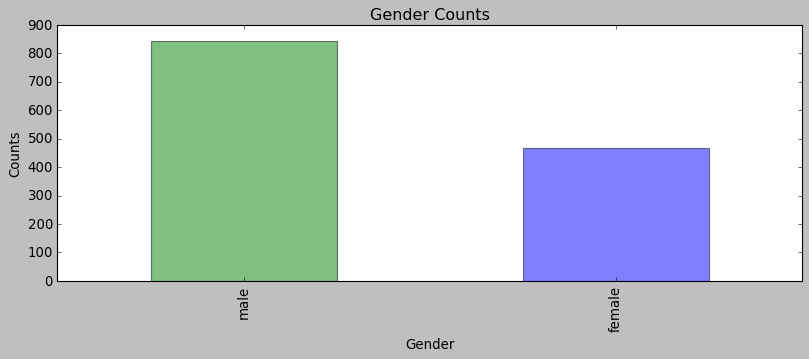

In [33]:
# Method 1 - matplotlib
# your code here
gender = titanic['Gender'].value_counts()
gender.plot(kind = 'bar',alpha = 0.5, color = ['Green', 'Blue'])
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Counts')

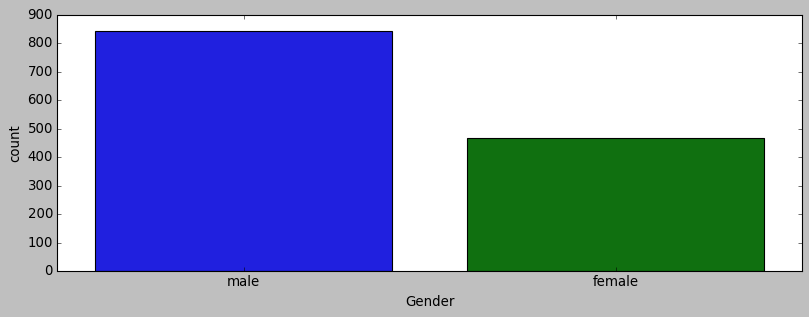

In [24]:
# Method 2 - seaborn
# your code here

sns.countplot(x='Gender', data=titanic)

#### Use the right plot to visualize the column `Pclass`.

In [25]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
348,349,1.0,3,"Coutts, Master. William Loch ""William""",male,3.000000,1,1,C.A. 37671,15.9000,U0,S
360,361,0.0,3,"Skoog, Mr. Wilhelm",male,40.000000,1,4,347088,27.9000,U0,S
49,50,0.0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.000000,1,0,349237,17.8000,U0,S
268,269,1.0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.000000,0,1,PC 17582,153.4625,C125,S
550,551,1.0,1,"Thayer, Mr. John Borland Jr",male,17.000000,0,2,17421,110.8833,C70,C
115,116,0.0,3,"Pekoniemi, Mr. Edvard",male,21.000000,0,0,STON/O 2. 3101294,7.9250,U0,S
1276,1277,NaN,2,"Herman, Miss. Kate",female,24.000000,1,2,220845,65.0000,U0,S
1086,1087,NaN,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.000000,0,0,347465,7.8542,U0,S
484,485,1.0,1,"Bishop, Mr. Dickinson H",male,25.000000,1,0,11967,91.0792,B49,C
1188,1189,NaN,3,"Samaan, Mr. Hanna",male,23.105446,2,0,2662,21.6792,U0,C


Text(0.5, 1.0, 'Pclass Counts')

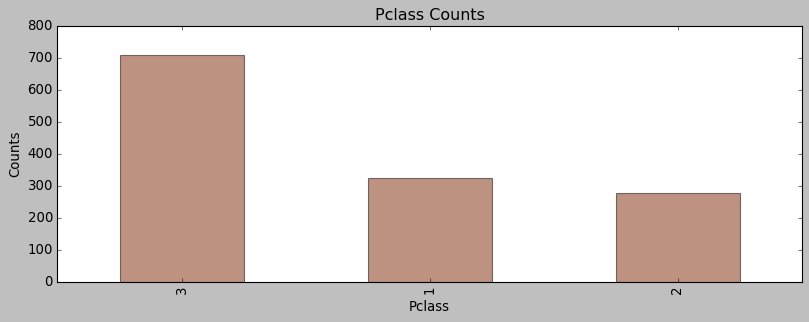

In [26]:
# your code here
pclass = titanic['Pclass'].value_counts()
pclass.plot(kind = 'bar',alpha = 0.5, colormap = 'Oranges_r')
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.title('Pclass Counts')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [27]:
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

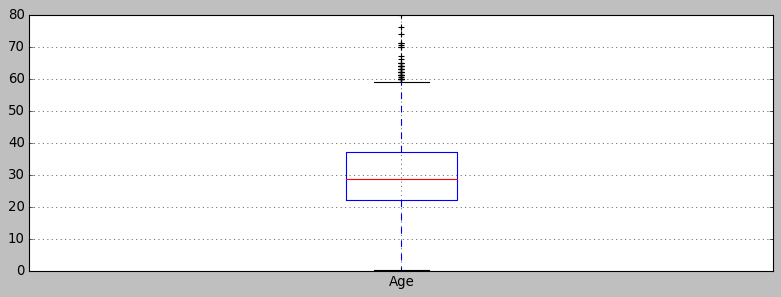

In [28]:
# your code here
titanic['Age'].plot(kind = 'box')
plt.grid()

In [29]:
"""
A boxplot is a standardized way of displaying the distribution of data based on a five number summary 
(“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
It can tell you about your outliers and what their values are.
"""

'\nA boxplot is a standardized way of displaying the distribution of data based on a five number summary \n(“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). \nIt can tell you about your outliers and what their values are.\n'

#### What does the last plot tell you about the feature `Age`?

In [30]:
"""
There was a lot of outliers, the median age is 28 years old, 25% was under 21 and 25% upper then 36.
"""

'\nThere was a lot of outliers, the median age is 28 years old, 25% was under 21 and 25% upper then 36.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

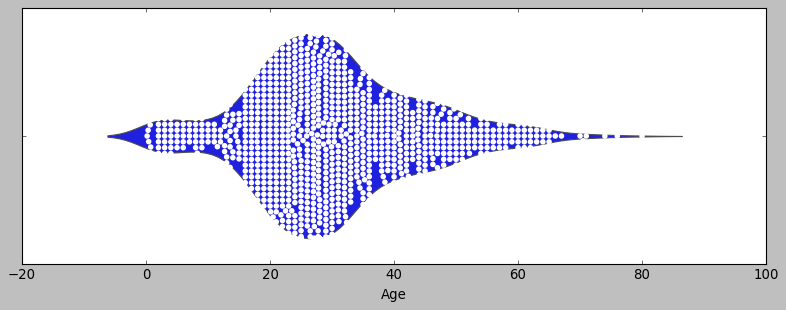

In [31]:
# your code here
ax = sns.violinplot('Age', data=titanic, inner=None)
ax = sns.swarmplot('Age', data=titanic,
                   color="white", edgecolor="black")

#### What additional information does the last plot provide about feature `Age`?

In [0]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [317]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


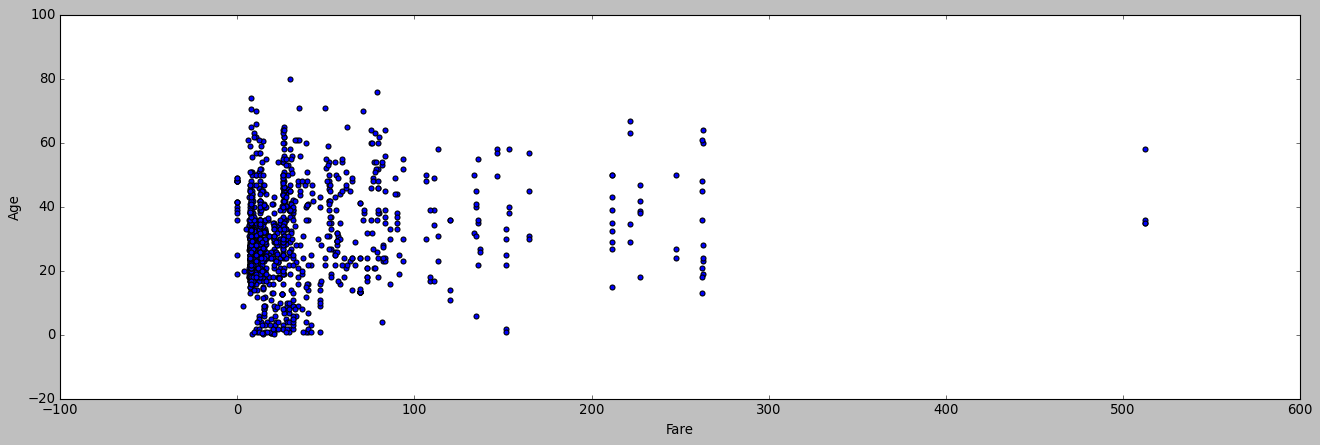

In [322]:
# Method 1 - matplotlib
# your code here
relationship = titanic[['Fare', 'Age']]
titanic.plot(kind = 'scatter', x = 'Fare', y = 'Age')

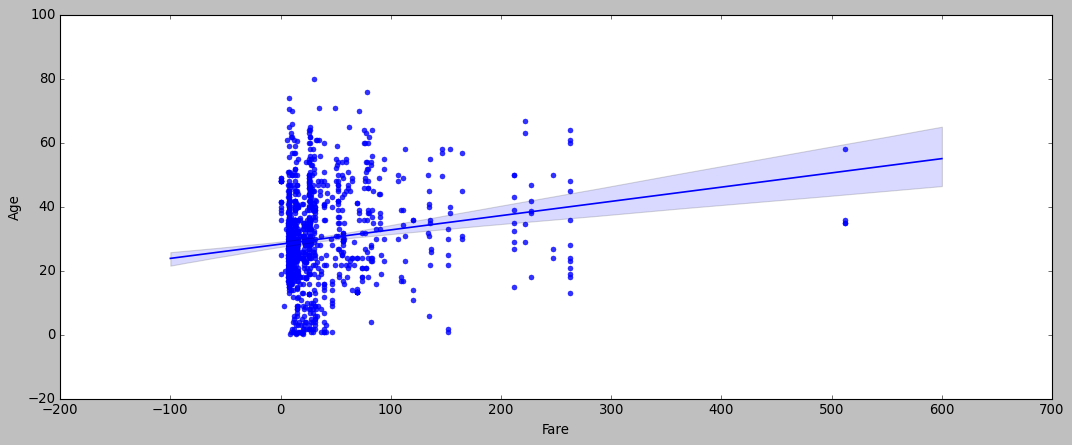

In [325]:
# Method 2 - seaborn
# your code here
sns.regplot(x=titanic["Fare"], y=titanic["Age"])

#### Plot the correlation matrix using seaborn.

Text(0.5, 1.0, 'Correlation matrix')

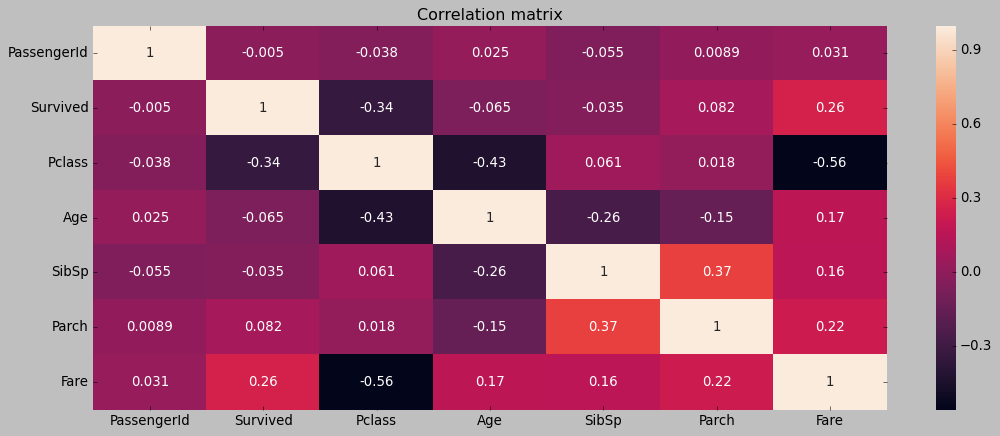

In [341]:
#your code here
sns.heatmap(titanic.corr(), annot=True)
plt.title('Correlation matrix')

#### What are the most correlated features?

In [0]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [358]:
titanic['Age'].groupby(titanic['Pclass'])

Pclass  Age 
1       36.0    12
        30.0    11
        35.0    11
        45.0    11
        24.0     9
                ..
3       61.0     1
        63.0     1
        65.0     1
        70.5     1
        74.0     1
Name: Age, Length: 304, dtype: int64

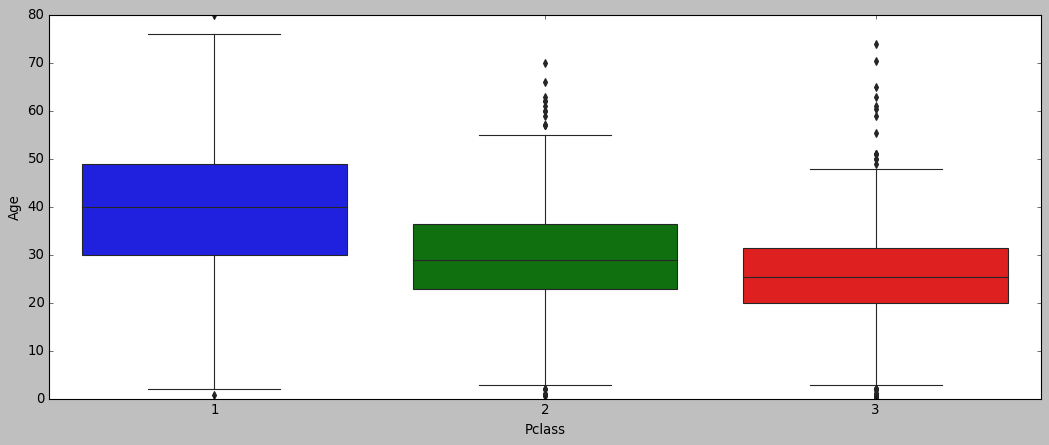

In [362]:
# your code here
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

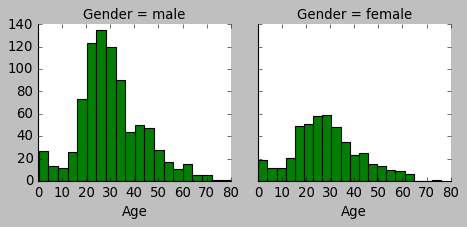

In [376]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g = g.map(plt.hist, "Age", bins=20, color="g")

In [1]:
titanic.sex.value_counts().plot.bar(stacked=True, color=['blue', 'red'], rot=0)

NameError: name 'titanic' is not defined